#Loading the Keyword Data

In [1]:
#Calling libraries
#!pip install cudf-cu11 --extra-index-url=https://pypi.ngc.nvidia.com
#!rm -rf /usr/local/lib/python3.8/dist-packages/cupy*
#!pip install cupy-cuda11x
import urllib
import numpy as np
#import cudf as cu
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
from numba import jit, njit, vectorize, cuda

In [2]:
#Retrieving files
urllib.request.urlretrieve("https://raw.githubusercontent.com/SisonkeBiotik-Africa/AfriBioML/main/CSV/refinedkeywords_final.csv", "refinedkeywords_final.csv")

('refinedkeywords_final.csv', <http.client.HTTPMessage at 0x7fb1c6859250>)

In [3]:
#Creating dataframes
df = pd.read_csv("refinedkeywords_final.csv", sep=";")

In [4]:
df.shape

(46292, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46292 entries, 0 to 46291
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Keyword          46292 non-null  object
 1   Class            46292 non-null  object
 2   EID              46292 non-null  object
 3   Year             46292 non-null  int64 
 4   Highly Cited     46292 non-null  bool  
 5   North Africa     46292 non-null  bool  
 6   OA               46292 non-null  bool  
 7   Journal Article  46292 non-null  bool  
dtypes: bool(4), int64(1), object(3)
memory usage: 1.6+ MB


#Generating the co-occurrence matrices

In [6]:
#Defining a function
def matrixg(df):
  keywords = list(df["Keyword"].value_counts()[0:50].index)
  print("length of keywords: "+str(len(keywords)))
  dfmatrix = pd.DataFrame(columns = keywords, index = keywords)
  dfmatrix[:] = int(0)
  for i in keywords:
    print(i)
    for j in keywords:
      dfmatrix[i][j] = sum([list(df[df["Keyword"] == i]["EID"]).count(x) for x in list(df[df["Keyword"] == j]["EID"])])
  return dfmatrix

In [ ]:
#Generating the keyword co-occurrence matrix for all the research publications
dfmatrix = matrixg(df)

length of keywords: 50
machine learning
deep learning
human
classification
medical diagnosis
convolutional neural network
medical imaging
artificial neural network
algorithm
magnetic-resonance imaging
support vector machine
artificial intelligence
disease
health care
accuracy
COVID-19
computer-aided diagnosis
adult
female
feature extraction
image segmentation
prediction
decision tree
forecasting
male
Internet of things
technique
data mining
convolution
deep neural network
medical procedure
image processing
sensitivity and specificity
random forest
transfer learning
computed tomography
breast cancer
image classification
detection
feature selection
receiver operating characteristic
big data
brain
k-nearest neighbors algorithm
image analysis
automation
image enhancement
nearest neighbor search
classification algorithm
diagnostic test


In [ ]:
#Generating the keyword co-occurrence matrix for highly cited research publications
dfmatrixHC = matrixg(df[df["Highly Cited"] == True])

length of keywords: 50
machine learning
human
deep learning
classification
medical diagnosis
artificial neural network
algorithm
medical imaging
convolutional neural network
magnetic-resonance imaging
adult
accuracy
artificial intelligence
computer-aided diagnosis
female
support vector machine
male
disease
technique
health care
medical procedure
feature extraction
image segmentation
prediction
sensitivity and specificity
data mining
COVID-19
convolution
decision tree
deep neural network
forecasting
receiver operating characteristic
image processing
breast cancer
Internet of things
image analysis
transfer learning
automation
random forest
detection
aged
computed tomography
feature selection
diagnostic test
young adult
brain
middle age
pathology
pattern recognition
k-nearest neighbors algorithm


In [ ]:
#Generating the keyword co-occurrence matrix for North African research publications
dfmatrixNA = matrixg(df[df["North Africa"] == True])

length of keywords: 50
machine learning
deep learning
classification
convolutional neural network
medical diagnosis
medical imaging
human
artificial neural network
magnetic-resonance imaging
support vector machine
disease
computer-aided diagnosis
artificial intelligence
COVID-19
accuracy
algorithm
image segmentation
health care
feature extraction
decision tree
forecasting
deep neural network
Internet of things
convolution
data mining
prediction
transfer learning
computed tomography
image processing
female
image classification
breast cancer
adult
feature selection
technique
sensitivity and specificity
detection
male
random forest
k-nearest neighbors algorithm
medical procedure
nearest neighbor search
network architecture
chest radiograph
biomedical signal processing
brain
image enhancement
automation
biomedical informatics
electroencephalography


In [7]:
#Generating the keyword co-occurrence matrix for open access research publications
dfmatrixOA = matrixg(df[df["OA"] == True])

length of keywords: 50
machine learning
human
deep learning
algorithm
medical diagnosis
convolutional neural network
classification
medical imaging
artificial neural network
COVID-19
female
adult
magnetic-resonance imaging
support vector machine
artificial intelligence
accuracy
health care
male
prediction
disease
technique
medical procedure
feature extraction
image segmentation
computer-aided diagnosis
sensitivity and specificity
decision tree
Internet of things
forecasting
image processing
computed tomography
random forest
receiver operating characteristic
deep neural network
transfer learning
diagnostic test
data mining
epidemiology
detection
convolution
SARS-CoV-2
chest radiograph
risk factor
animal
breast cancer
non-human
aged
feature selection
image analysis
automation


In [13]:
#Generating the keyword co-occurrence matrix for journal articles
dfmatrixJO = matrixg(df[df["Journal Article"] == True])

length of keywords: 50
machine learning
human
deep learning
algorithm
medical diagnosis
classification
convolutional neural network
artificial neural network
medical imaging
adult
female
support vector machine
accuracy
magnetic-resonance imaging
male
COVID-19
feature extraction
disease
artificial intelligence
prediction
technique
health care
image segmentation
medical procedure
computer-aided diagnosis
sensitivity and specificity
decision tree
forecasting
Internet of things
deep neural network
image processing
receiver operating characteristic
random forest
convolution
data mining
diagnostic test
computed tomography
detection
feature selection
transfer learning
breast cancer
aged
image classification
image analysis
animal
automation
epidemiology
chest radiograph
middle age
brain


In [17]:
#Generating the keyword co-occurrence matrix for research papers that have been published since 2020
dfmatrix2020 = matrixg(df[df["Year"] >= 2020])

length of keywords: 50
machine learning
deep learning
human
convolutional neural network
classification
medical diagnosis
medical imaging
algorithm
artificial neural network
COVID-19
support vector machine
magnetic-resonance imaging
disease
artificial intelligence
health care
accuracy
image segmentation
prediction
computer-aided diagnosis
feature extraction
female
decision tree
adult
forecasting
Internet of things
deep neural network
convolution
male
technique
image processing
transfer learning
computed tomography
medical procedure
sensitivity and specificity
image classification
random forest
detection
data mining
breast cancer
chest radiograph
feature selection
network architecture
image enhancement
diagnostic test
brain
receiver operating characteristic
long short-term memory
nearest neighbor search
performance
k-nearest neighbors algorithm


#Generating the co-occurrence networks

In [18]:
dfm = dfmatrix2020.copy()

#Return the max weight
maxweight = 0
for index, row in dfm.iterrows():
    for col in row:
        weight = float(col)
        if (weight >= maxweight): maxweight = weight

#add weights to edges
keywords = list(dfm.index)
print(keywords)
edge_list = [] #test networkx
for index, row in dfm.iterrows():
    i = 0
    for col in row:
        weight = float(col)/maxweight
        edge_list.append((index, dfm.columns[i], weight))
        i += 1

#Remove edge if 0.0
updated_edge_list = [x for x in edge_list if not x[2] == 0.0]

#create duple of char, occurance in novel
node_list = []
for i in keywords:
    for e in updated_edge_list:
        if i == e[0] and i == e[1]:
           node_list.append((i, e[2]*6))
for i in node_list:
    if i[1] == 0.0:
        node_list.remove(i)

#remove self references
for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)

['machine learning', 'deep learning', 'human', 'convolutional neural network', 'classification', 'medical diagnosis', 'medical imaging', 'algorithm', 'artificial neural network', 'COVID-19', 'support vector machine', 'magnetic-resonance imaging', 'disease', 'artificial intelligence', 'health care', 'accuracy', 'image segmentation', 'prediction', 'computer-aided diagnosis', 'feature extraction', 'female', 'decision tree', 'adult', 'forecasting', 'Internet of things', 'deep neural network', 'convolution', 'male', 'technique', 'image processing', 'transfer learning', 'computed tomography', 'medical procedure', 'sensitivity and specificity', 'image classification', 'random forest', 'detection', 'data mining', 'breast cancer', 'chest radiograph', 'feature selection', 'network architecture', 'image enhancement', 'diagnostic test', 'brain', 'receiver operating characteristic', 'long short-term memory', 'nearest neighbor search', 'performance', 'k-nearest neighbors algorithm']


[3000.0, 842.3245157258905, 552.3849198083732, 451.7808789835451, 418.6627785877942, 441.7829618829411, 478.6502811914185, 531.1393459695897, 345.55300978962714, 336.1799625078109, 275.5675900853989, 661.1122682774421, 258.07123515934177, 266.81941262237035, 403.6659029368881, 226.2028744011664, 262.44532389085606, 184.33659654238699, 182.46198708602373, 181.2122474484482, 178.71276817329723, 174.33867944178297, 241.1997500520725, 163.0910227036034, 242.44948968964803, 141.84544886481984, 141.22057904603207, 138.72109977088107, 126.84857321391377, 154.34284524057486, 130.5977921266403, 153.09310560299937, 115.60091647573422, 113.1014372005832, 119.35013538846074, 108.10247865028118, 119.35013538846074, 140.59570922724433, 96.2299520933139, 123.09935430118723, 81.23307644240784, 77.48385752968132, 81.23307644240784, 76.23411789210581, 74.9843782545303, 83.10768589877108, 74.35950843574254, 73.73463861695481, 81.23307644240784, 71.86002916059155]


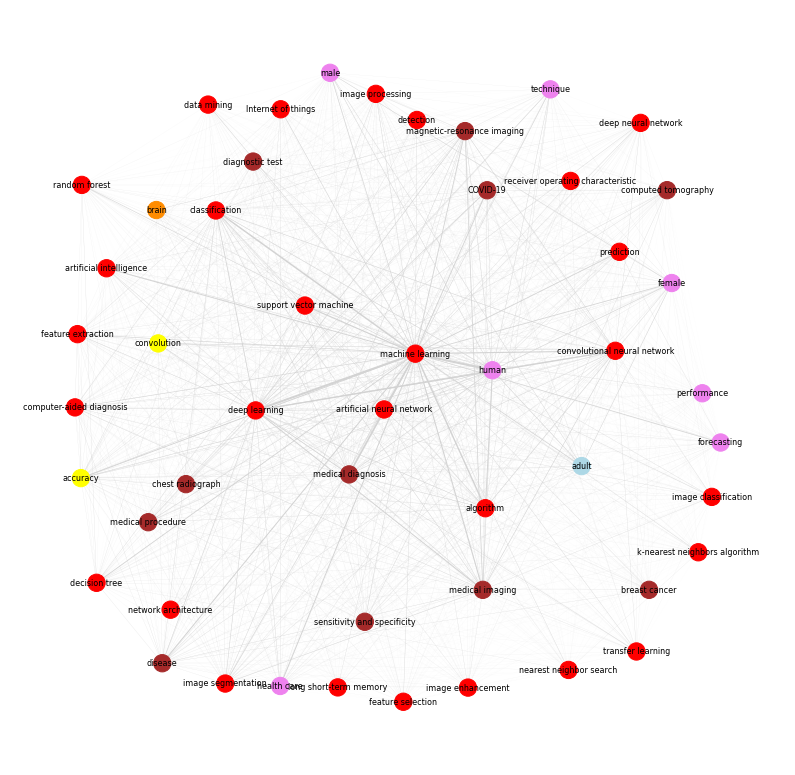

In [19]:
#set canvas size
plt.subplots(figsize=(14,14))

#networkx graph time!
G = nx.Graph()
for i in sorted(node_list):
    G.add_node(i[0], size = i[1])
G.add_weighted_edges_from(updated_edge_list)

#check data of graphs
G.nodes(data=True)
G.edges(data=True)

#Getting the node names
node_order = [w[0] for w in node_list]

#reorder node list
updated_node_order = []
for i in node_order:
    for x in node_list:
        if x[0] == i:
            updated_node_order.append(x)
  
#reorder edge list
test = nx.get_edge_attributes(G, 'weight')
updated_again_edges = []
for i in nx.edges(G):
    for x in test.keys():
        if i[0] == x[0] and i[1] == x[1]:
            updated_again_edges.append(test[x])

#drawing customization
node_scalar = 500
edge_scalar = 10
sizes = [x[1]*node_scalar for x in updated_node_order]
print(sizes)
widths = [x*edge_scalar for x in updated_again_edges]

#draw the graph
pos = nx.spring_layout(G, k=0.42, iterations=17)

caract = df.iloc[:,0:2].drop_duplicates()

carac = pd.DataFrame({'ID': caract["Keyword"], 
                      'type': caract["Class"]})

carac = carac.set_index('ID')
carac = carac.reindex(G.nodes())
carac['type'] = pd.Categorical(carac['type'])
carac['type'].cat.codes
# Specify colors
cmap = matplotlib.colors.ListedColormap(['darkorange', 'red', 'lightgreen', 'lightblue', 'purple', 'yellow', 'pink', 'brown', 'violet'])

# Draw graph
nx.draw(G, pos, with_labels=True, node_color=carac['type'].cat.codes, edge_color="lightgrey", font_size=8, cmap=cmap, 
        width = widths)


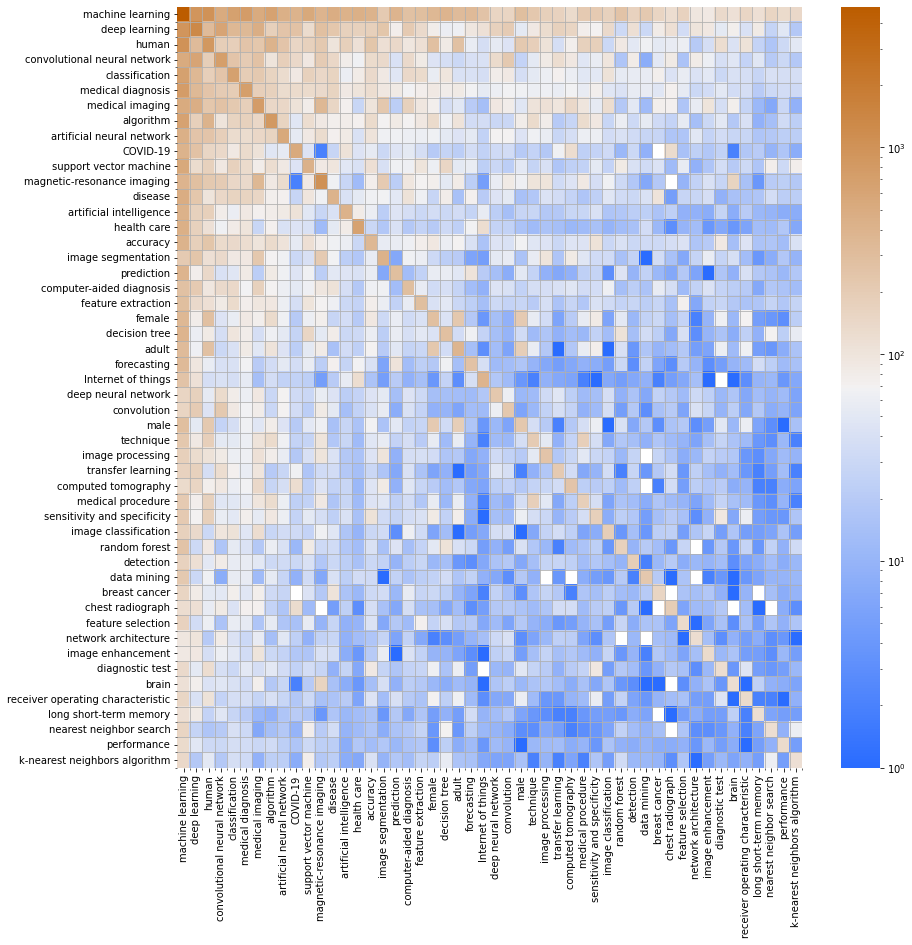

In [20]:
import seaborn as sns
from matplotlib.colors import LogNorm
plt.subplots(figsize=(14,14))
dfmatrix01 = dfmatrix2020.fillna(value=np.nan)
ax = sns.heatmap(dfmatrix01, cmap=sns.diverging_palette(260, 30, s=100, center='light', as_cmap=True), norm=LogNorm())
ax.grid(False, 'major')
ax.grid(True, 'minor')
ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)